Neste bloco, as bibliotecas necessárias são importadas:

* PydanticOutputParser: um parser que ajuda a formatar e validar a saída usando classes do Pydantic.
* ChatOpenAI: uma interface para acessar o modelo de IA da OpenAI via LangChain.
* load_dotenv: carrega variáveis de ambiente definidas em um arquivo .env.
* módulos personalizados: Table, prompt_image e encode_base64
  * Table provavelmente define o formato dos dados de saída, 
  * prompt_image fornece o prompt inicial para o modelo, e 
  * encode_base64 codifica a imagem para o formato base64.
* O load_dotenv() carrega as variáveis de ambiente (como chaves de API) que podem ser usadas

In [ ]:
from langchain_core.output_parsers import PydanticOutputParser
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

from schema import Table
from prompt import prompt_image
from utils import encode_base64

load_dotenv()



In [ ]:
# Instância o modelo
model = ChatOpenAI(model="gpt-4o-mini", model_kwargs={"response_format": {"type": "json_object"}})

In [ ]:
# Prompt
prompt = prompt_image()

In [ ]:
# Parse 
parser = PydanticOutputParser(pydantic_object=Table)
# Instrução de formatação
prompt = prompt.partial(format_instructions=parser.get_format_instructions())

In [ ]:
# Chain
chain = prompt | model | parser

In [7]:
# files
from pathlib import Path
import re

path = Path('../data/imgs/')

images_path = [p for p in path.rglob('*.*') if re.match(r'tabela.{1}\.bmp', p.name)]

In [8]:
results = []
for path in images_path:
    image_data = encode_base64(path)
    results.append(chain.invoke({"image_data": image_data}))

{'titulo': 'Formato Vertical para Cada Cenário',
 'cenario': ['Atual',
  'Não ponderado',
  'Ponderado',
  'Inverno',
  'Outono',
  'Primavera',
  'Verão'],
 'cobertura': [44, 91, 88, 79, 78, 79, 80],
 'percentual_cobertura': [26.7, 55.2, 53.3, 47.9, 47.3, 47.9, 48.5]}

None


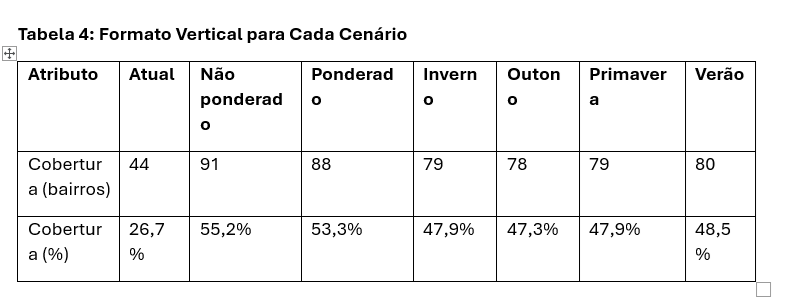

{'titulo': 'Formato Básico com Percentagem e Valores Separados',
 'cenario': ['Atual',
  'Não ponderado',
  'Ponderado',
  'Inverno',
  'Outono',
  'Primavera',
  'Verão'],
 'cobertura': [44, 91, 88, 79, 78, 79, 80],
 'percentual_cobertura': [26.7, 55.2, 53.3, 47.9, 47.3, 47.9, 48.5]}

None


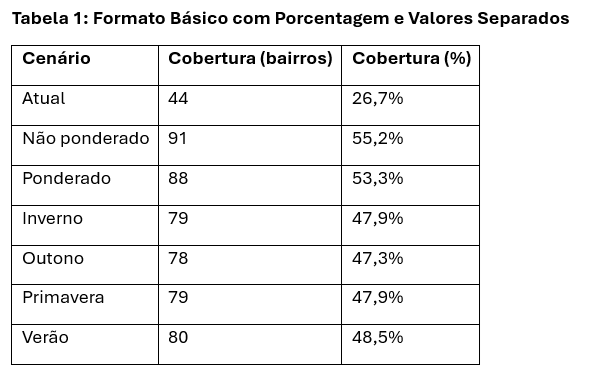

{'titulo': 'Tabela 2: Formato Compacto, Unindo Valores e Percentagem',
 'cenario': ['Atual',
  'Não ponderado',
  'Ponderado',
  'Inverno',
  'Outono',
  'Primavera',
  'Verão'],
 'cobertura': [44, 91, 88, 79, 78, 79, 80],
 'percentual_cobertura': [26.7, 55.2, 53.3, 47.9, 47.3, 47.9, 48.5]}

None


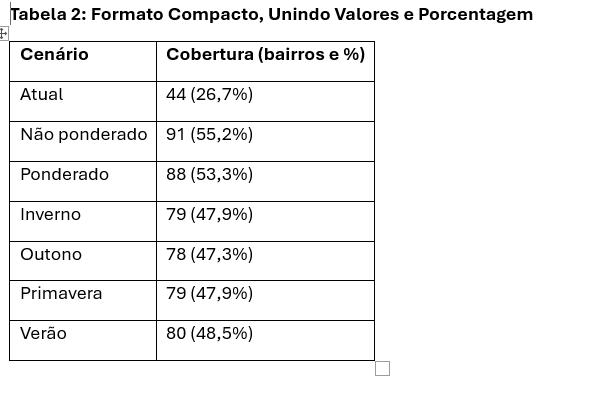

{'titulo': 'Formato com Notas sobre Cobertura em Observações',
 'cenario': ['Atual',
  'Não ponderado',
  'Ponderado',
  'Inverno',
  'Outono',
  'Primavera',
  'Verão'],
 'cobertura': [44, 91, 88, 79, 78, 79, 80],
 'percentual_cobertura': [None, 55.2, None, 47.9, 47.3, 47.9, 48.5]}

None


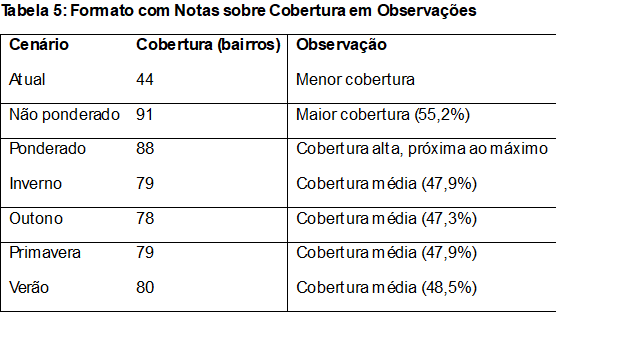

{'titulo': 'Estilo com Coluna de Diferença para o Cenário Atual',
 'cenario': ['Atual',
  'Não ponderado',
  'Ponderado',
  'Inverno',
  'Outono',
  'Primavera'],
 'cobertura': [44, 91, 88, 79, 78, 79],
 'percentual_cobertura': [26.7, 55.2, 53.3, 47.9, 47.3, 47.9]}

None


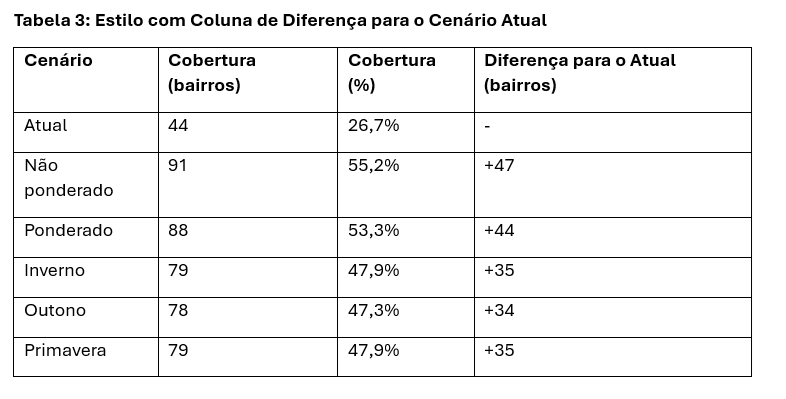

In [ ]:
from PIL import Image   
from IPython.display import display

for res, path in zip(results, images_path):
    print(display(res.dict()))
    display(Image.open(path))